In [1]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir('../')

In [2]:
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11

In [3]:
df_2022 = pd.read_stata('data/2022/2022.dta')
print(f"Total records in the survey data: {len(df_2022)}")
print(f"Total columns in the survey data: {len(df_2022.columns)}")
df_2022.head()

Total records in the survey data: 45762
Total columns in the survey data: 417


,studyno,version,doi,country,c_sample,c_alphan,v1,v2,v3,v4,...,DATEMO,DATEDY,INTLANG,DWEIGHT_HH,DWEIGHT_TS,DWEIGHT_COM,PSWEIGHT,WEIGHT_COM,MODE,PARTIALS
0,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,40. AT-Austria,40. AT-Austria,AT,1. Strongly agree,5. Strongly disagree,5. Strongly disagree,5. Strongly disagree,...,1. January,28,11. German (deu),1.210093,1. No weighting,1.210093,0.627508,0.170447,"50. CAWI, self-completion, web questionnaire",1. Complete case
1,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,40. AT-Austria,40. AT-Austria,AT,4. Disagree,1. Strongly agree,2. Agree,2. Agree,...,1. January,5,11. German (deu),1.210093,1. No weighting,1.210093,1.529463,0.85329,"50. CAWI, self-completion, web questionnaire",1. Complete case
2,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,40. AT-Austria,40. AT-Austria,AT,4. Disagree,1. Strongly agree,1. Strongly agree,2. Agree,...,1. January,30,11. German (deu),1.649203,1. No weighting,1.649203,2.394,3.139915,"50. CAWI, self-completion, web questionnaire",1. Complete case
3,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,40. AT-Austria,40. AT-Austria,AT,5. Strongly disagree,2. Agree,2. Agree,1. Strongly agree,...,1. January,5,11. German (deu),1.649203,1. No weighting,1.649203,1.057297,2.905909,"50. CAWI, self-completion, web questionnaire",1. Complete case
4,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,40. AT-Austria,40. AT-Austria,AT,1. Strongly agree,5. Strongly disagree,4. Disagree,5. Strongly disagree,...,1. January,5,11. German (deu),0.675291,1. No weighting,0.675291,0.460084,0.530512,"50. CAWI, self-completion, web questionnaire",1. Complete case


In [4]:
household_factors_keys = [
    'HOMPOP', 'HHCHILDR', 'HHTODD',
    'v34', 'v35', 'v32',
    'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45',
    'v46', 'v47', 'v48',
    'PARTLIV', 'SPWORK', 'SPWRKHRS', 'SPMAINST', 'v62', 'v61',
    'v1', 'v2', 'v3', 'v4', 'v6', 'v9', 'v10'
]

In [5]:
questions_mapping_dict = json.load(open('/Users/ashishpapanai/Desktop/MS_Tübingen/Data_Literacy/data/2022/ZA10000_variables_short.json'))

In [6]:
questions_list = []
questions_dict = {}
for key in household_factors_keys:
    question_text = questions_mapping_dict.get(key, "Question text not found")
    questions_list.append(question_text)
    questions_dict[key] = question_text 

In [7]:
json.dump(questions_dict, open('notebooks/household_factors_questions.json', 'w'), indent=4)

In [8]:
data_household_factors = df_2022[household_factors_keys]
data_household_factors.columns = questions_list
data_household_factors.head()

,How many persons in household,How many children above school entry age in household,How many children below school age in household,Q15a How many hours spend on household work,Q15b How many hours spend on family members,Q13 Elderly people: provider of domestic help,Q18a Division of household work: doing the laundry,Q18b Division of household work: plan social/family activities,Q18c Division of household work: care for sick family members,Q18d Division of household work: shops for groceries,...,"Spouse, partner: main status",Q29 Highest completed degree of education for spouse/partner [merged variable],Q28b Current financial situation of household compared to 12 months ago,Q1a Working mom can establish as warm relationship as a not working mom,Q1b Pre-school child is likely to suffer if mother works,Q1c Family life suffers when woman has full-time job,Q1d What women really want is home and kids,"Q1f Men's job earn money, women's job look after home",Q3a Should women work: child under school age,Q3b Should women work: youngest kid at school
0,2. Two persons,1. One child [school entry age] to 17,0. No children below [age of school entry],18,30,2. Government agencies,"-4. NAP, no partn. or not liv. with part. (c.2...","-4. NAP, no partn. or not liv. with part. (c.2...","-4. NAP, no partn. or not liv. with part. (c.2...","-4. NAP, no partn. or not liv. with part. (c.2...",...,"-4. NAP (c.3,-7 PARTLIV; US: c. 2 (if neither ...","-4. NAP (c. 3,-7 PARTLIV; IT, RU: c. 2,3,-7 PA...",5. Much worse,1. Strongly agree,5. Strongly disagree,5. Strongly disagree,5. Strongly disagree,5. Strongly disagree,1. Work full-time,1. Work full-time
1,1. One person (only respondent),0. No children [school entry age] to 17,0. No children below [age of school entry],8,"0. None, no hours",2. Government agencies,"-4. NAP, no partn. or not liv. with part. (c.2...","-4. NAP, no partn. or not liv. with part. (c.2...","-4. NAP, no partn. or not liv. with part. (c.2...","-4. NAP, no partn. or not liv. with part. (c.2...",...,"-4. NAP (c.3,-7 PARTLIV; US: c. 2 (if neither ...","-4. NAP (c. 3,-7 PARTLIV; IT, RU: c. 2,3,-7 PA...",4. Somewhat worse,4. Disagree,1. Strongly agree,2. Agree,2. Agree,2. Agree,2. Work part-time,2. Work part-time
2,4. Four persons,0. No children [school entry age] to 17,0. No children below [age of school entry],3,3,2. Government agencies,2. Usually me,1. Always me,4. Usually my spouse/partner,1. Always me,...,"-4. NAP (c.3,-7 PARTLIV; US: c. 2 (if neither ...","-4. NAP (c. 3,-7 PARTLIV; IT, RU: c. 2,3,-7 PA...",4. Somewhat worse,4. Disagree,1. Strongly agree,1. Strongly agree,2. Agree,3. Neither agree nor disagree,3. Stay at home,3. Stay at home
3,4. Four persons,0. No children [school entry age] to 17,0. No children below [age of school entry],5,4,2. Government agencies,2. Usually me,3. About equal or both together,1. Always me,4. Usually my spouse/partner,...,1. In paid work,453. Post-sec non-tert educ voc: Level complet...,5. Much worse,5. Strongly disagree,2. Agree,2. Agree,1. Strongly agree,1. Strongly agree,3. Stay at home,3. Stay at home
4,4. Four persons,2. Two children [school entry age] to 17,0. No children below [age of school entry],5,20,1. Family members,1. Always me,3. About equal or both together,3. About equal or both together,3. About equal or both together,...,1. In paid work,840. Doctoral or equivalent level: Academic,4. Somewhat worse,1. Strongly agree,5. Strongly disagree,4. Disagree,5. Strongly disagree,5. Strongly disagree,1. Work full-time,1. Work full-time


**-------------------**


/var/folders/29/4fw9_r0j43523wypj9p3hfnw0000gn/T/ipykernel_27411/2754985782.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


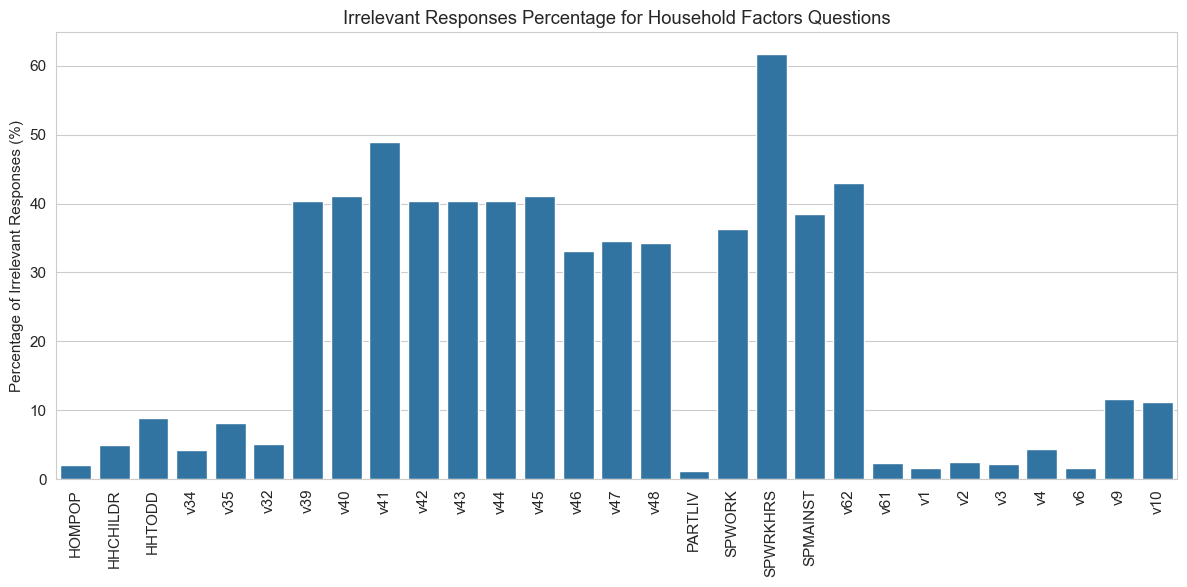

/var/folders/29/4fw9_r0j43523wypj9p3hfnw0000gn/T/ipykernel_27411/2754985782.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


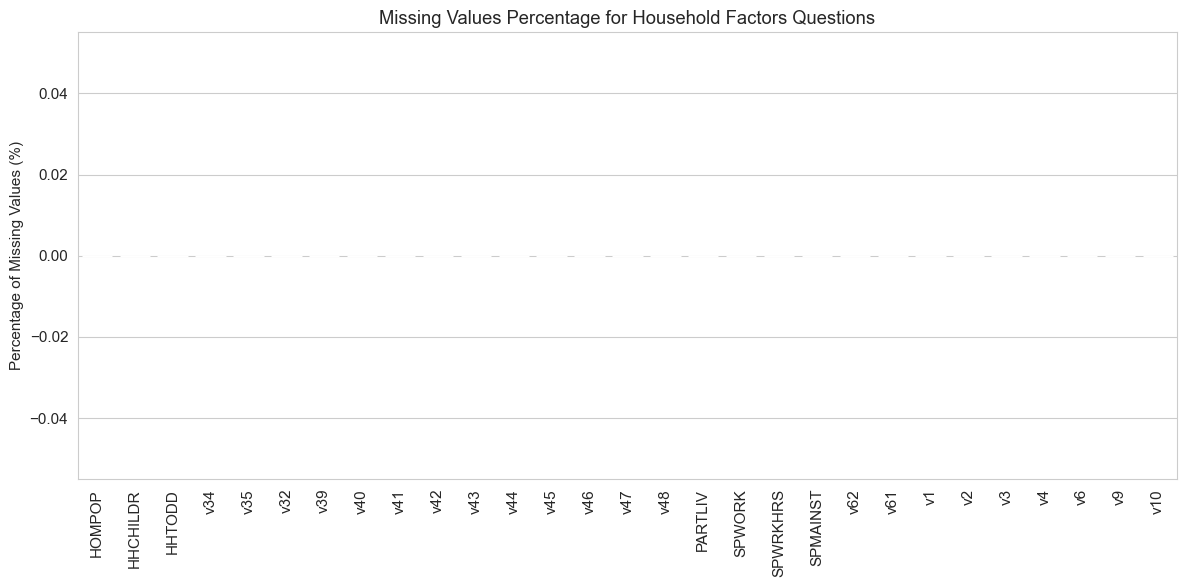

In [9]:
mapping_missing_values = {}
for cols in data_household_factors.columns:
    missing_percentage = data_household_factors[cols].isnull().mean() * 100
    mapping_missing_values[cols] = missing_percentage

print("**-------------------**")
mapping_irrelevant_responses = {}
for cols in data_household_factors.columns:
    irregular_percentage = (data_household_factors[cols].astype(str).str.startswith('-').mean()) * 100
    mapping_irrelevant_responses[cols] = irregular_percentage

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x=household_factors_keys, y=list(mapping_irrelevant_responses.values()), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Percentage of Irrelevant Responses (%)")
ax.set_title("Irrelevant Responses Percentage for Household Factors Questions")
plt.tight_layout()
plt.show()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x=household_factors_keys, y=list(mapping_missing_values.values()), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Percentage of Missing Values (%)")
ax.set_title("Missing Values Percentage for Household Factors Questions")
plt.tight_layout()
plt.show()

In [10]:
import textwrap

In [11]:
many_response_cols = []
for cols in data_household_factors.columns:
    valid = data_household_factors[cols][~data_household_factors[cols].astype(str).str.startswith('-') & data_household_factors[cols].notnull()]
    if valid.nunique() > 10:
        many_response_cols.append(cols)
        continue
    percs = valid.value_counts(normalize=True) * 100
    n_cat = len(percs)
    fig_height = max(2.5, n_cat * 0.5)
    fig, ax = plt.subplots(figsize=(8, fig_height*1.25))
    wrapped_labels = [textwrap.fill(str(lbl), width=45) for lbl in percs.index]
    sns.barplot(x=percs.values, y=wrapped_labels, ax=ax, color="#4C72B0")
    ax.set_title(f"Distribution of Responses\n{cols}", fontsize=12, loc="left")
    ax.set_xlabel("Percentage (%)")
    ax.set_ylabel("")
    for i, v in enumerate(percs.values):
        ax.text(v + 0.5, i, f"{v:.1f}%", va="center", fontsize=10)
    plt.tight_layout()
    plt.subplots_adjust(left=0.35)
    os.makedirs('notebooks/plots', exist_ok=True)
    plt.savefig(f'notebooks/plots/household_factors_{cols[:30].replace(" ", "_")}.png')
    plt.close()

In [ ]:
data_household_factors.to_csv('./household_factors_data.csv', index=False)

In [14]:
for col in many_response_cols:
    print(col)
    valid = data_household_factors[col][~data_household_factors[col].astype(str).str.startswith('-') & data_household_factors[col].notnull()]
    print(f"Number of valid responses: {len(valid)}")
    percs = valid.value_counts(normalize=True) * 100
    n_cat = len(percs)
    fig_height = max(2.5, n_cat * 0.5)
    fig, ax = plt.subplots(figsize=(8, fig_height*1.25))
    wrapped_labels = [textwrap.fill(str(lbl), width=45) for lbl in percs.index]
    sns.barplot(x=percs.values, y=wrapped_labels, ax=ax, color="#4C72B0")
    ax.set_title(f"Distribution of Responses\n{col}", fontsize=12, loc="left")
    ax.set_xlabel("Percentage (%)")
    ax.set_ylabel("")
    for i, v in enumerate(percs.values):
        ax.text(v + 0.5, i, f"{v:.1f}%", va="center", fontsize=10)
    plt.tight_layout()
    plt.subplots_adjust(left=0.35)
    os.makedirs('notebooks/plots/long_unique_values', exist_ok=True)
    plt.savefig(f'notebooks/plots/long_unique_values/household_factors_{col[:30].replace(" ", "_")}.png')
    plt.close()

How many persons in household
Number of valid responses: 44836
Q15a How many hours spend on household work
Number of valid responses: 43834
Q15b How many hours spend on family members
Number of valid responses: 42009
Spouse, partner: hours worked weekly
Number of valid responses: 17497
Q29 Highest completed degree of education for spouse/partner [merged variable]
Number of valid responses: 26090


In [15]:
def bin_responses(value):
    try:
        num = int(float(value))
        if num <= 4:
            return str(num)
        elif 5 <= num <= 10:
            return '5-10'
        elif 11 <= num <= 20:
            return '11-20'
        elif 21 <= num <= 30:
            return '21-30'
        else:
            return '30+'
    except:
        return 'Invalid'


for col in many_response_cols:
    print(col)
    valid = data_household_factors[col][~data_household_factors[col].astype(str).str.startswith('-') & data_household_factors[col].notnull()]
    print(f"Number of valid responses: {len(valid)}")
    # percs = valid.value_counts(normalize=True) * 100
    binned_valid = valid.apply(bin_responses)
    percs = binned_valid.value_counts(normalize=True) * 100
    n_cat = len(percs)
    fig_height = max(2.5, n_cat * 0.5)
    fig, ax = plt.subplots(figsize=(8, fig_height*1.25))
    wrapped_labels = [textwrap.fill(str(lbl), width=45) for lbl in percs.index]
    sns.barplot(x=percs.values, y=wrapped_labels, ax=ax, color="#4C72B0")
    ax.set_title(f"Distribution of Responses\n{col}", fontsize=12, loc="left")
    ax.set_xlabel("Percentage (%)")
    ax.set_ylabel("")
    for i, v in enumerate(percs.values):
        ax.text(v + 0.5, i, f"{v:.1f}%", va="center", fontsize=10)
    plt.tight_layout()
    plt.subplots_adjust(left=0.35)
    os.makedirs('notebooks/plots/long_unique_values_binned', exist_ok=True)
    plt.savefig(f'notebooks/plots/long_unique_values_binned/household_factors_{col[:30].replace(" ", "_")}.png')
    plt.close()

How many persons in household
Number of valid responses: 44836
Q15a How many hours spend on household work
Number of valid responses: 43834
Q15b How many hours spend on family members
Number of valid responses: 42009
Spouse, partner: hours worked weekly
Number of valid responses: 17497
Q29 Highest completed degree of education for spouse/partner [merged variable]
Number of valid responses: 26090
